<a href="https://colab.research.google.com/github/khushi24it-star/CA-2-project/blob/main/best_selling_books_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [19]:
import pandas as pd

df = pd.read_csv("/content/best sellin books 2023.csv", encoding='latin1')

print(df.head())


   id                                          Book name  \
0  #1  Atomic Habits: An Easy & Proven Way to Build G...   
1  #2    Iron Flame (Standard Edition) (The Empyrean, 2)   
2  #3                                              Spare   
3  #4                                        Fourth Wing   
4  #5                                    The Woman in Me   

                             Author              Rating  reviews count  \
0                       James Clear  4.8 out of 5 stars         145747   
1                    Rebecca Yarros  4.7 out of 5 stars         395512   
2  Prince Harry  The Duke of Sussex  4.5 out of 5 stars         116101   
3                    Rebecca Yarros  4.8 out of 5 stars         472618   
4                    Britney Spears  4.4 out of 5 stars          51520   

        form   price Reading age  Print Length   Publishing date  \
0  Hardcover  $18.88         NaN         320.0        16/10/2018   
1  Hardcover  $11.05         NaN         640.0        07/1

In [21]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               100 non-null    object 
 1   Book name        100 non-null    object 
 2   Author           100 non-null    object 
 3   Rating           100 non-null    object 
 4   reviews count    100 non-null    int64  
 5   form             100 non-null    object 
 6   price            100 non-null    object 
 7   Reading age      30 non-null     object 
 8   Print Length     98 non-null     float64
 9   Publishing date  100 non-null    object 
 10  Genre            100 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 8.7+ KB
None


In [20]:
print(df.describe(include="all"))

         id                                          Book name         Author  \
count   100                                                100            100   
unique  100                                                100             84   
top      #1  Atomic Habits: An Easy & Proven Way to Build G...  Sarah J. Maas   
freq      1                                                  1              5   
mean    NaN                                                NaN            NaN   
std     NaN                                                NaN            NaN   
min     NaN                                                NaN            NaN   
25%     NaN                                                NaN            NaN   
50%     NaN                                                NaN            NaN   
75%     NaN                                                NaN            NaN   
max     NaN                                                NaN            NaN   

                    Rating 

In [8]:
print(df.isnull().sum())


id                  0
Book name           0
Author              0
Rating              0
reviews count       0
form                0
price               0
Reading age        70
Print Length        2
Publishing date     0
Genre               0
dtype: int64


In [22]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns
num_cols, cat_cols

(Index(['reviews count', 'Print Length'], dtype='object'),
 Index(['id', 'Book name', 'Author', 'Rating', 'form', 'price', 'Reading age',
        'Publishing date', 'Genre'],
       dtype='object'))

In [28]:
# Display missing values before handling
print("Missing values before mean imputation:")
print(df[num_cols].isnull().sum())

# Fill missing numerical values with mean
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Display missing values after handling
print("\nMissing values after mean imputation:")
print(df[num_cols].isnull().sum())

# Display missing values after handling
print("\nMissing values after mean imputation:")
print(df[num_cols].isnull().sum())

Missing values before mean imputation:
reviews count    0
Print Length     0
dtype: int64

Missing values after mean imputation:
reviews count    0
Print Length     0
dtype: int64

Missing values after mean imputation:
reviews count    0
Print Length     0
dtype: int64


In [29]:
# Count duplicate rows before removal
duplicate_count_before = df.duplicated().sum()
print("Duplicate records before removal:", duplicate_count_before)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Count duplicate rows after removal
duplicate_count_after = df.duplicated().sum()
print("Duplicate records after removal:", duplicate_count_after)

Duplicate records before removal: 0
Duplicate records after removal: 0


In [30]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(col, "outliers:", len(outliers))


reviews count outliers: 11
Print Length outliers: 3


In [33]:
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()
df[cat_cols].head()

,id,Book name,Author,Rating,form,price,Reading age,Publishing date,Genre
0,#1,atomic habits: an easy & proven way to build g...,james clear,4.8 out of 5 stars,hardcover,$18.88,NaN,16/10/2018,self-improvement
1,#2,"iron flame (standard edition) (the empyrean, 2)",rebecca yarros,4.7 out of 5 stars,hardcover,$11.05,NaN,07/11/2023,fiction & action & adventure
2,#3,spare,prince harry the duke of sussex,4.5 out of 5 stars,hardcover,$11.99,NaN,"january 10, 2023",biographies & memoirs
3,#4,fourth wing,rebecca yarros,4.8 out of 5 stars,paperback,$13.62,NaN,17/09/2024,fiction & action & adventure
4,#5,the woman in me,britney spears,4.4 out of 5 stars,hardcover,$11.37,NaN,"october 24, 2023",biographies & memoirs


In [34]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns

Index(['id', 'book_name', 'author', 'rating', 'reviews_count', 'form', 'price',
       'reading_age', 'print_length', 'publishing_date', 'genre'],
      dtype='object')

In [41]:
df['publishing_date'] = pd.to_datetime(df['publishing_date'], errors='coerce')
df['year'] = df['publishing_date'].dt.year
df['year'].head()


,year
0,2018.0
1,2023.0
2,NaN
3,2024.0
4,NaN


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head()

,reviews_count,print_length
0,0.277213,-0.126553
1,2.312781,0.855802
2,0.035600,0.168153
3,2.941190,0.561095
4,-0.490731,-0.224789


In [47]:
df[num_cols] = (df[num_cols] - df[num_cols].min()) / (df[num_cols].max() - df[num_cols].min())
df[num_cols].head()


,reviews_count,print_length
0,0.219218,0.103064
1,0.603581,0.214485
2,0.173596,0.136490
3,0.722239,0.181058
4,0.074212,0.091922


In [48]:
df[num_cols] = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std()
df[num_cols].head()


,reviews_count,print_length
0,0.275824,-0.125919
1,2.301188,0.851512
2,0.035422,0.167310
3,2.926447,0.558283
4,-0.488271,-0.223662


In [49]:
df[num_cols].mean()


,0
reviews_count,1.088019e-16
print_length,9.325873e-17


In [50]:
df[num_cols].median()


,0
reviews_count,-0.280962
print_length,-0.028176


In [51]:
df[num_cols].mode().iloc[0]


,0
reviews_count,-0.879323
print_length,0.118439


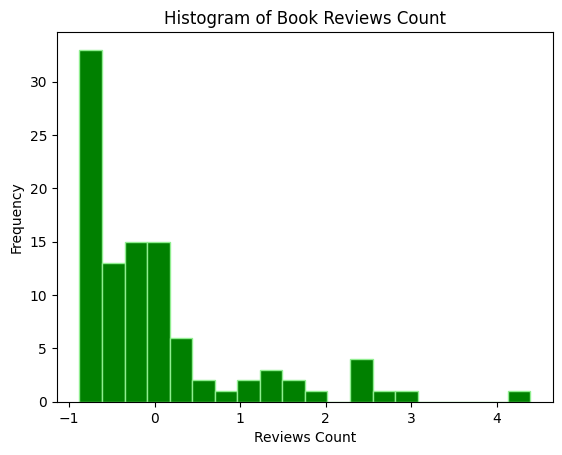

In [81]:
plt.hist(df['reviews_count'],bins=20, color="green", edgecolor="lightgreen")
plt.title("Histogram of Book Reviews Count")
plt.xlabel("Reviews Count")
plt.ylabel("Frequency")
plt.show()


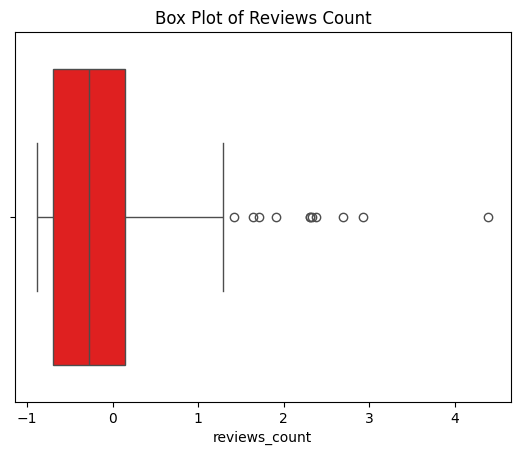

In [75]:
sns.boxplot(x=df['reviews_count'], color="red")
plt.title("Box Plot of Reviews Count")
plt.show()


In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['genre_label'] = le.fit_transform(df['genre'])
df[['genre', 'genre_label']].head()


,genre,genre_label
0,self-improvement,15
1,fiction & action & adventure,6
2,biographies & memoirs,1
3,fiction & action & adventure,6
4,biographies & memoirs,1


In [69]:
df_encoded = pd.get_dummies(df, columns=['author'])
df_encoded.head()


,id,book_name,rating,reviews_count,form,price,reading_age,print_length,publishing_date,genre,...,author_sarah j. maas,author_scholastic,author_shelby van pelt,author_snoop dogg,author_stephen king,author_suzanne collins,author_taylor jenkins reid,author_walter isaacson,"author_wendy loggia, elisa chavarri",author_wonder house books
0,#1,atomic habits: an easy & proven way to build g...,4.8 out of 5 stars,0.275824,hardcover,$18.88,NaN,-0.126553,2018-10-16,self-improvement,...,False,False,False,False,False,False,False,False,False,False
1,#2,"iron flame (standard edition) (the empyrean, 2)",4.7 out of 5 stars,2.301188,hardcover,$11.05,NaN,0.855802,2023-11-07,fiction & action & adventure,...,False,False,False,False,False,False,False,False,False,False
2,#3,spare,4.5 out of 5 stars,0.035422,hardcover,$11.99,NaN,0.168153,NaT,biographies & memoirs,...,False,False,False,False,False,False,False,False,False,False
3,#4,fourth wing,4.8 out of 5 stars,2.926447,paperback,$13.62,NaN,0.561095,2024-09-17,fiction & action & adventure,...,False,False,False,False,False,False,False,False,False,False
4,#5,the woman in me,4.4 out of 5 stars,-0.488271,hardcover,$11.37,NaN,-0.224789,NaT,biographies & memoirs,...,False,False,False,False,False,False,False,False,False,False


In [70]:
df_final = pd.get_dummies(df, drop_first=True)
df_final.head()


,reviews_count,print_length,publishing_date,year,genre_label,id_#10,id_#100,id_#11,id_#12,id_#13,...,genre_fiction & action & adventure,genre_health & fitness & dieting,genre_humor & entertainment,genre_mystery & thriller & suspense,genre_politics & social sciences,genre_puzzles & games,genre_reading & writing,genre_romance,genre_schools & teaching,genre_self-improvement
0,0.275824,-0.126553,2018-10-16,2018.0,15,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2.301188,0.855802,2023-11-07,2023.0,6,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.035422,0.168153,NaT,NaN,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2.926447,0.561095,2024-09-17,2024.0,6,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,-0.488271,-0.224789,NaT,NaN,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
